In [118]:
#Step (1): Read Data
import pandas as pd #Read data
import numpy as np  #Array

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data_train = pd.read_excel("train.xlsx")
data_test = pd.read_excel("test.xlsx")
data_train.head() # Show data (看看是否讀取成功)

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
0,58.785714,63.833333,43.213333,231.000000,0.039474,61.255411,3,0.053652,-0.037180,6235.000000,6029.000000,0,0.999244,1,0
1,52.357143,57.857143,58.053333,92.090000,0.732759,91.393846,4,0.074205,0.155243,1750.000000,1422.000000,0,0.950294,2,1
2,30.674860,36.714286,36.661527,836.239303,0.229050,68.931202,3,0.121504,0.031717,2679.476981,2200.824592,0,1.000000,1,0
3,32.119048,41.571429,63.213333,588.800000,0.090909,54.455267,3,0.153716,0.009326,362.900000,0.000000,0,0.918970,1,1
4,41.214286,49.404762,52.486667,683.900000,0.072727,61.922799,3,0.097287,-0.030090,2777.000000,2001.000000,0,0.906411,1,0


In [119]:
data_train.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000
mean,38.984541,45.294944,52.784871,656.507337,0.225864,75.190124,3.319754,0.109481,0.015342,2553.566565,2209.062206,0.297463,0.833713,1.319754,0.428132
std,14.540574,15.546263,64.786127,717.237752,0.232311,14.008806,0.684632,0.090865,0.125137,1829.663990,1810.428997,0.572666,12.506317,0.684632,0.494871
min,7.902370,8.047619,2.562656,-8000.000000,0.000000,47.889610,3.000000,0.003690,-1.043000,0.675070,0.000000,0.000000,-600.000000,1.000000,0.000000
25%,28.642857,34.880952,43.504429,224.700000,0.030303,62.761544,3.000000,0.058475,-0.055860,948.100000,579.800000,0.000000,0.802960,1.000000,0.000000
50%,38.976190,47.023810,53.053333,413.100000,0.142857,76.677489,3.000000,0.085307,0.005701,2276.000000,1898.000000,0.000000,0.937191,1.000000,0.000000
75%,50.119048,57.345238,60.650000,834.969651,0.371429,86.821260,3.000000,0.143723,0.078966,3839.552040,3455.073327,1.000000,0.987258,1.000000,1.000000
max,75.619048,79.547619,4000.000000,4412.000000,0.966667,100.000000,6.000000,1.776212,1.208233,8410.000000,8129.000000,5.000000,500.000000,4.000000,1.000000


In [120]:
# Appendix: Data preprocessing (程式供參考用)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #建構standardization的物件

#name_list_outlier = ['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標',
                #'手機電池電量','手機外殼/包膜指標','外型平均曲率','上網頻率指標',
                #'通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級']

name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)', '手機背蓋溫度(平均)','平均APP運作指標/小時', '充電時間指標', '手機電池電量', '上網頻率指標', '通話頻率指標', '內容容量比率']
name_pre_outlier = ['Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Mobile Phone Battery Level','Content Capacity Ratio']


#離群值處理
def  outlier_del(data_frame,name_list_outlier,n1=5,n2=5):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1

        # 定义离群值范围
        lower_bound = Q1 - n1 * IQR
        upper_bound = Q3 + n2 * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame

#data_train=outlier_del(data_train,['手機螢幕溫度(平均)'],n1=0.1,n2=5)
#data_train=outlier_del(data_train,['手機背蓋溫度(平均)'],n1=0.1,n2=5)
#data_train=outlier_del(data_train,['上網頻率指標'],n1=0.1,n2=5)
data_train=outlier_del(data_train,name_list_outlier,n1=4,n2=4)

data_train.describe()


手機螢幕溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機螢幕溫度(最大)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3902,)
平均APP運作指標/小時
Shape Of The Before Ouliers:  (3902,)
Shape Of The After Ouliers:  (3830,)
充電時間指標
Shape Of The Before Ouliers:  (3830,)
Shape Of The After Ouliers:  (3830,)
手機電池電量
Shape Of The Before Ouliers:  (3830,)
Shape Of The After Ouliers:  (3830,)
上網頻率指標
Shape Of The Before Ouliers:  (3830,)
Shape Of The After Ouliers:  (3830,)
通話頻率指標
Shape Of The Before Ouliers:  (3830,)
Shape Of The After Ouliers:  (3830,)
內容容量比率
Shape Of The Before Ouliers:  (3830,)
Shape Of The After Ouliers:  (3801,)


,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,38.962214,45.324557,51.905921,604.312104,0.225005,75.167726,3.300447,0.109813,0.015688,2482.091050,2136.939156,0.304920,0.864388,1.300447,0.429098
std,14.545865,15.534182,14.121878,569.658290,0.231510,14.004451,0.673344,0.091590,0.125558,1759.609465,1739.699641,0.578018,0.172376,0.673344,0.495012
min,7.902370,8.047619,2.562656,2.806544,0.000000,47.889610,3.000000,0.003690,-1.043000,0.675070,0.000000,0.000000,0.055373,1.000000,0.000000
25%,28.547619,34.738095,43.525909,224.200000,0.029412,62.770563,3.000000,0.058489,-0.055860,930.600000,556.000000,0.000000,0.805458,1.000000,0.000000
50%,38.809524,46.952381,53.053333,407.263972,0.142857,76.587302,3.000000,0.085611,0.005942,2212.000000,1843.000000,0.000000,0.937216,1.000000,0.000000
75%,50.119048,57.476190,60.700000,796.595221,0.371429,86.544012,3.000000,0.144050,0.079059,3789.000000,3368.072728,1.000000,0.987014,1.000000,1.000000
max,75.619048,79.547619,118.066667,3265.000000,0.966667,100.000000,6.000000,1.776212,1.208233,8410.000000,8129.000000,5.000000,1.000000,4.000000,1.000000


In [121]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define the features to process
features = ['手機螢幕溫度(平均)', '手機螢幕溫度(最大)', '手機背蓋溫度(平均)', '平均APP運作指標/小時', '充電時間指標',
            '手機電池電量', '手機外殼/包膜指標', '外型平均曲率', '上網頻率指標',
            '通話頻率指標', '新機/二手/老舊', '內容容量比率', 'CPU效能等級']

# Load your datasets
train_df = data_train
test_df = pd.read_excel('01test.xlsx')

# Calculate statistics from test data for normalization and standardization
test_min = test_df[features].min()
test_max = test_df[features].max()
test_range = test_max - test_min
test_mean = test_df[features].mean()
test_std = test_df[features].std()

# Normalize and then standardize train data based on test data statistics
train_df_processed = train_df.copy()
train_df_processed[features] = (train_df[features] - test_min) / test_range  # Normalize
train_df_processed[features] = (train_df_processed[features] - test_mean) / test_std  # Standardize

# Save the processed train data to an Excel file
train_df_processed.to_excel('train_processed.xlsx', index=False)

data_train=train_df_processed

In [122]:
data_train.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,-2.620272,-2.849565,-3.547868,-0.984604,0.024193,-5.305197,3.300447,-0.364524,3.786543,-1.395746,-1.225267,-0.387907,0.004648,-1.807863,0.429098
std,0.014543,0.013843,0.008447,0.000192,1.054608,0.018987,0.673344,0.614209,0.457693,0.000110,0.000113,0.201416,0.953273,0.331819,0.495012
min,-2.651326,-2.882784,-3.577383,-0.984806,-1.000782,-5.342180,3.000000,-1.076193,-0.072659,-1.395901,-1.225406,-0.494159,-4.469358,-1.955921,0.000000
25%,-2.630685,-2.858999,-3.552881,-0.984732,-0.866802,-5.322004,3.000000,-0.708705,3.525731,-1.395843,-1.225370,-0.494159,-0.321245,-1.955921,0.000000
50%,-2.620425,-2.848114,-3.547182,-0.984670,-0.350019,-5.303272,3.000000,-0.526822,3.751017,-1.395763,-1.225286,-0.494159,0.407399,-1.955921,0.000000
75%,-2.609117,-2.838736,-3.542608,-0.984539,0.691202,-5.289773,3.000000,-0.134930,4.017546,-1.395664,-1.225187,-0.145699,0.682794,-1.955921,1.000000
max,-2.583622,-2.819068,-3.508293,-0.983707,3.402716,-5.271529,6.000000,10.810466,8.133688,-1.395374,-1.224878,1.248144,0.754607,-0.477541,1.000000


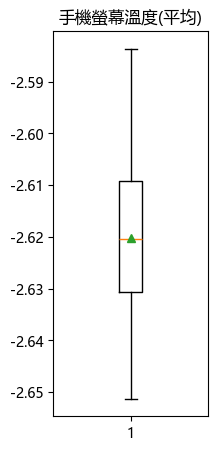

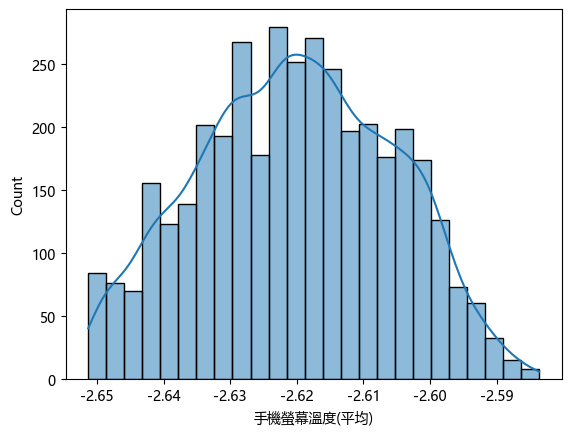

偏態(Skewness): -0.03
峰度(Kurtosis): -0.72


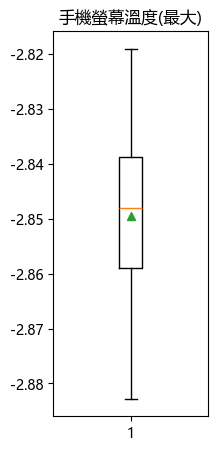

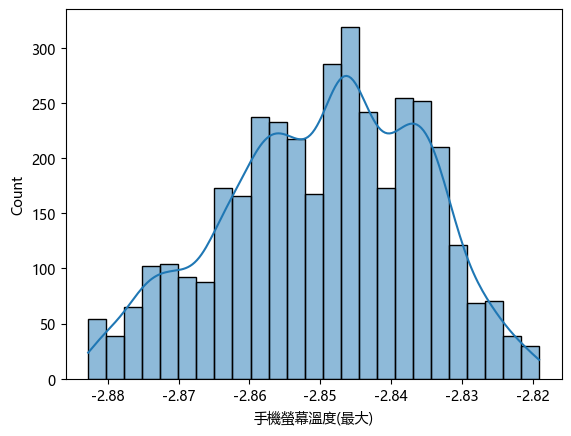

偏態(Skewness): -0.24
峰度(Kurtosis): -0.60


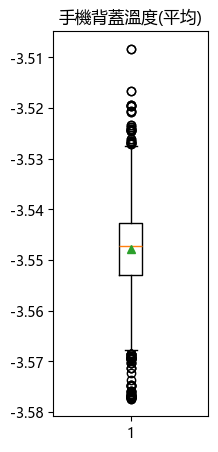

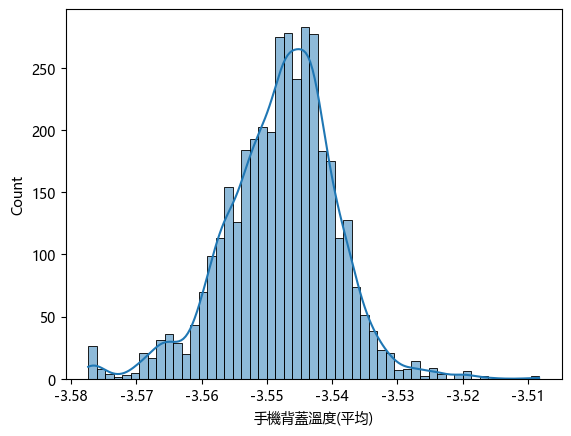

偏態(Skewness): -0.33
峰度(Kurtosis): 1.27


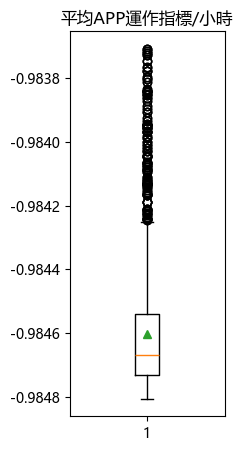

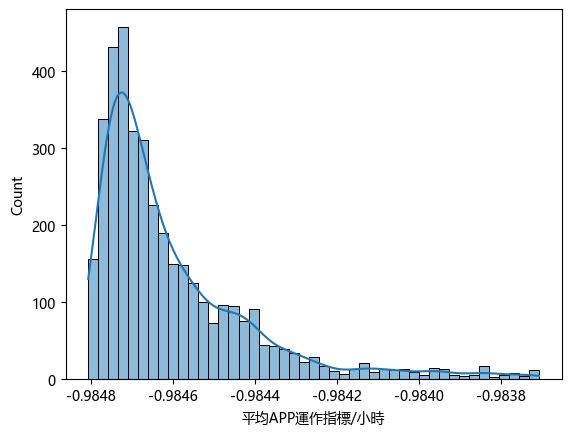

偏態(Skewness): 1.98
峰度(Kurtosis): 4.48


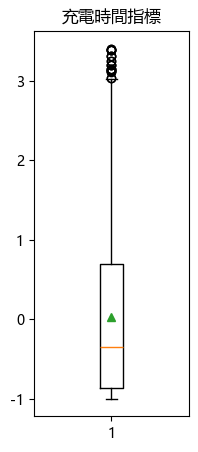

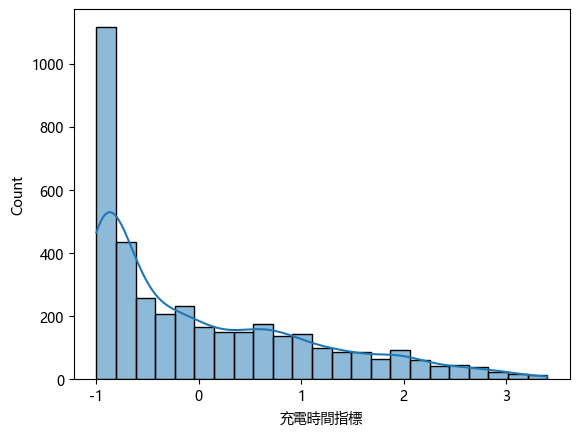

偏態(Skewness): 1.02
峰度(Kurtosis): 0.11


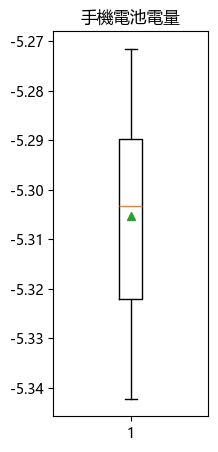

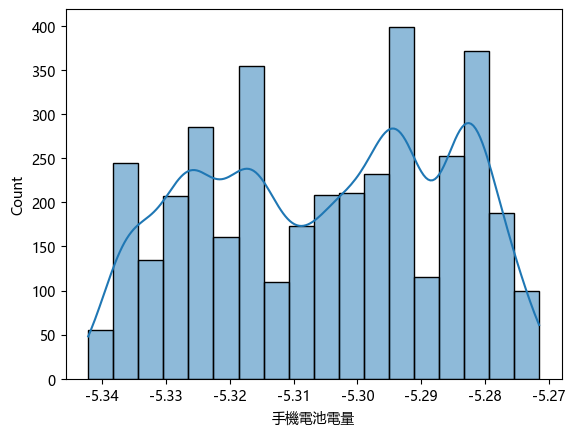

偏態(Skewness): -0.11
峰度(Kurtosis): -1.23


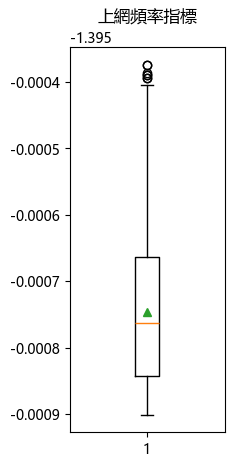

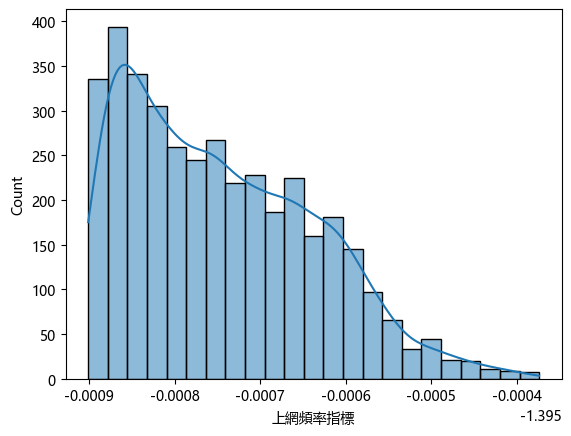

偏態(Skewness): 0.61
峰度(Kurtosis): -0.36


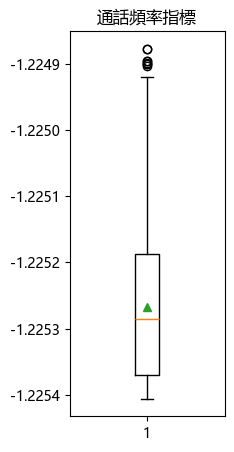

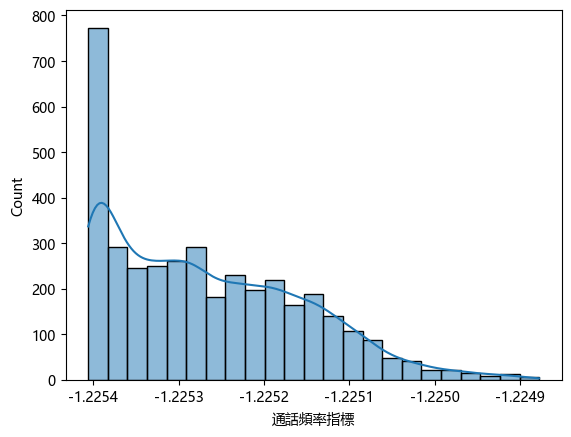

偏態(Skewness): 0.65
峰度(Kurtosis): -0.29


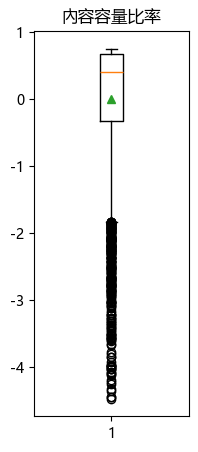

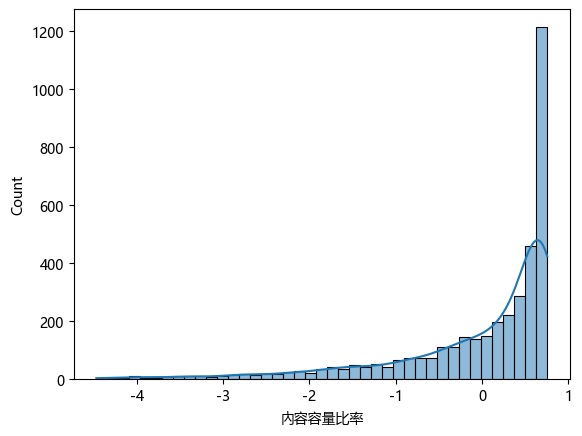

偏態(Skewness): -1.84
峰度(Kurtosis): 3.42


In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False

def box_graph(data_frame,name_list):
    for i in range(len(name_list)):
        plt.figure(figsize=(2,5))
        plt.boxplot(data_frame[name_list[i]],showmeans=True)   
        plt.title(name_list[i])
        plt.show()
        sns.histplot(data_frame[name_list[i]], kde=True)
        plt.show()
        print("偏態(Skewness): {:.2f}".format(data_frame[name_list[i]].skew()))
        print("峰度(Kurtosis): {:.2f}".format(data_frame[name_list[i]].kurt()))
        print('==================================================================================================')
box_graph(data_train,name_list_outlier)


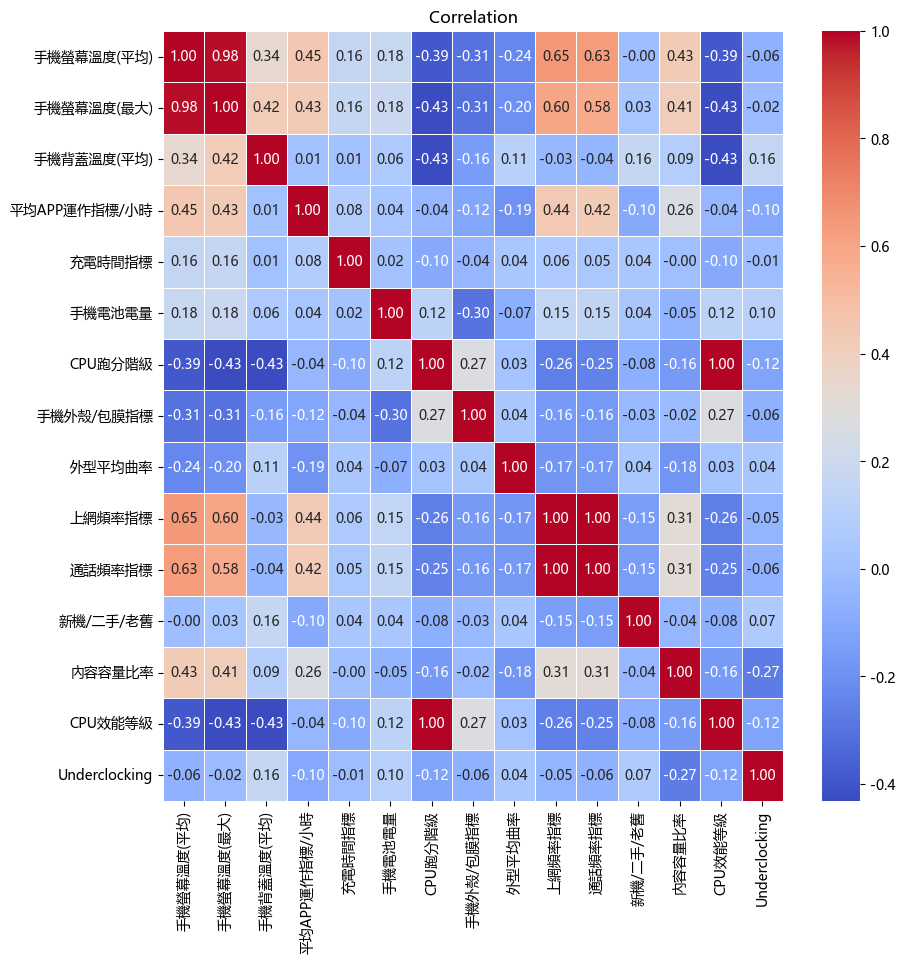

In [124]:

def corr_matrix_graph(data_frame):
    corr_matrix = data_frame.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f') #各參數代表的意思請查閱seaborn.heatmap官網的說明
    plt.title(' Correlation ')
    plt.show()
    
corr_matrix_graph(data_train)

In [129]:
#Step (3): 用X儲存features, Y為labels(Underclocking)
y_data = data_train['Underclocking'].to_numpy()
feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']

#feature_ex =['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標',
                #'手機電池電量','手機外殼/包膜指標','外型平均曲率','上網頻率指標',
               # '通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級']
x_data = data_train[feature_ex].to_numpy()



def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized
def data_standardized(data):
    standard_scaler = StandardScaler()
    data_standardized = standard_scaler.fit_transform(data)
    return data_standardized 
x_data=data_normalized(x_data)
x_data=data_standardized(x_data)
print(x_data) 
print(y_data) 
print(x_data) 
print(y_data) 

[[ 1.36300652 -0.61562149 -0.80150167 ...  2.1330885   2.23749711
   0.78243834]
 [ 0.92099655  0.43536847  2.19351346 ... -0.41610788 -0.41100958
   0.49842579]
 [-0.56981449 -1.07962976  0.01747584 ...  0.11219075  0.03672694
   0.78682338]
 ...
 [-1.36665061 -0.72751934  0.16482193 ... -1.3547237  -1.2284996
   0.1461305 ]
 [ 0.10900786  0.42781419  0.39875095 ...  0.62857951  0.63988476
  -0.78380936]
 [ 1.30898308  0.16152563 -0.86666265 ...  1.44250353  1.55050655
   0.32371546]]
[0 1 0 ... 0 0 0]
[[ 1.36300652 -0.61562149 -0.80150167 ...  2.1330885   2.23749711
   0.78243834]
 [ 0.92099655  0.43536847  2.19351346 ... -0.41610788 -0.41100958
   0.49842579]
 [-0.56981449 -1.07962976  0.01747584 ...  0.11219075  0.03672694
   0.78682338]
 ...
 [-1.36665061 -0.72751934  0.16482193 ... -1.3547237  -1.2284996
   0.1461305 ]
 [ 0.10900786  0.42781419  0.39875095 ...  0.62857951  0.63988476
  -0.78380936]
 [ 1.30898308  0.16152563 -0.86666265 ...  1.44250353  1.55050655
   0.32371546]]


In [130]:
def feature_matrix_numpy(data, feature_ex):
    data_df = pd.DataFrame(data, columns=feature_ex)

    # 绘制每个特征的直方图
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_ex):
        plt.subplot(3, 3, i + 1)  # 根据特征数量调整网格大小
        sns.histplot(data_df[feature], kde=True)
        plt.title(f'分布情况：{feature}')
    plt.tight_layout()
    plt.show()

    # 绘制所有特征的箱线图
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=data_df)  # 正确使用 data_df
    plt.xticks(rotation=45)
    plt.title('所有特征的箱线图')
    plt.show()

def feature_target_relationship_dataframe(data, feature_ex, target_feature):

    # 每个特征与目标特征的散点图
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_ex):
        plt.subplot(3, 3, i + 1)  # 根据特征数量调整网格大小
        sns.scatterplot(x=data[feature], y=data[target_feature])
        plt.title(f'{feature} 与 {target_feature} 的关系')
    plt.tight_layout()
    plt.show()

    # 每个特征与目标特征的箱线图
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_ex):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=data[target_feature], y=data[feature])
        plt.title(f'{feature} 根据 {target_feature} 的箱线图')
    plt.tight_layout()
    plt.show()

#===========================================================================
#feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']
#feature_matrix_numpy(x_data, feature_ex)  
#feature_target_relationship_dataframe(data_train, feature_ex, 'Underclocking')  


In [131]:
#Step (4): 把dataset分成訓練跟驗證
from sklearn.model_selection import train_test_split
#test_size=0.3 為比例-> training:test=7:3
trainX, testX, trainY, testY = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [133]:
from xgboost import XGBClassifier
import numpy as np 
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=10000, 
                             learning_rate=  0.001,
                             max_depth=5,
                             gamma=5)
# 使用訓練資料訓練模型
xgboostModel.fit(trainX, trainY)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(testX)
print('訓練集: ',xgboostModel.score(trainX,trainY))
print('測試集: ',xgboostModel.score(testX,testY))

訓練集:  0.7467105263157895
測試集:  0.7148488830486203


In [99]:
# 读取测试数据
data_test = pd.read_excel("test.xlsx")
test_id = data_test.pop('id')  
data_test=data_test[feature_ex]
# 假设 data_normalized 和 data_standardized 已正确定义
data_test = data_normalized(data_test)
data_test = data_standardized(data_test)

# 使用xgboost模型进行预测
predicted_ans = xgboostModel.predict(data_test)  # 确保这里使用的是正确处理后的测试数据

# 创建提交DataFrame
my_submission = pd.DataFrame({'id': test_id, 'Underclocking': predicted_ans})
my_submission.to_csv('submission.csv', index=False)


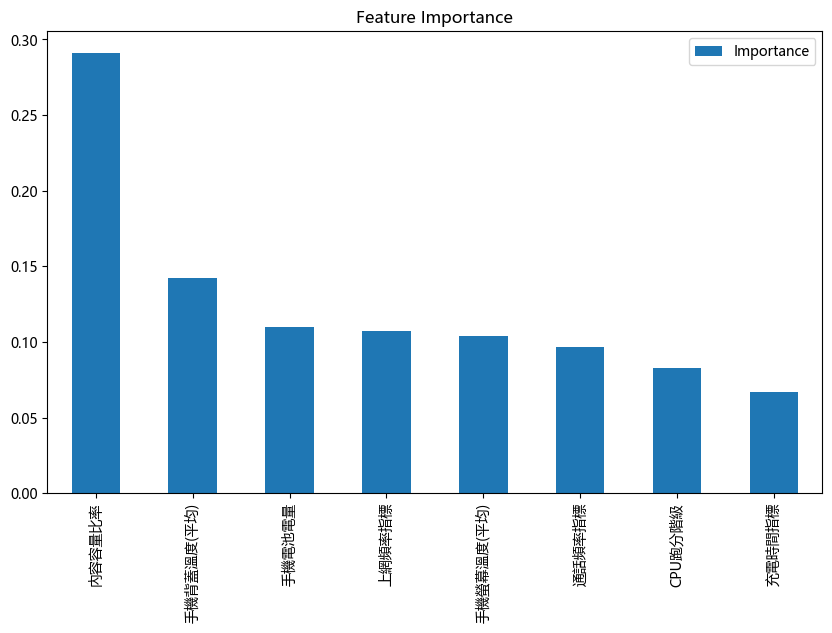

In [100]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False
importances = xgboostModel.feature_importances_
features = feature_ex
importance_df = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values('Importance', ascending=False)
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

[15:38:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


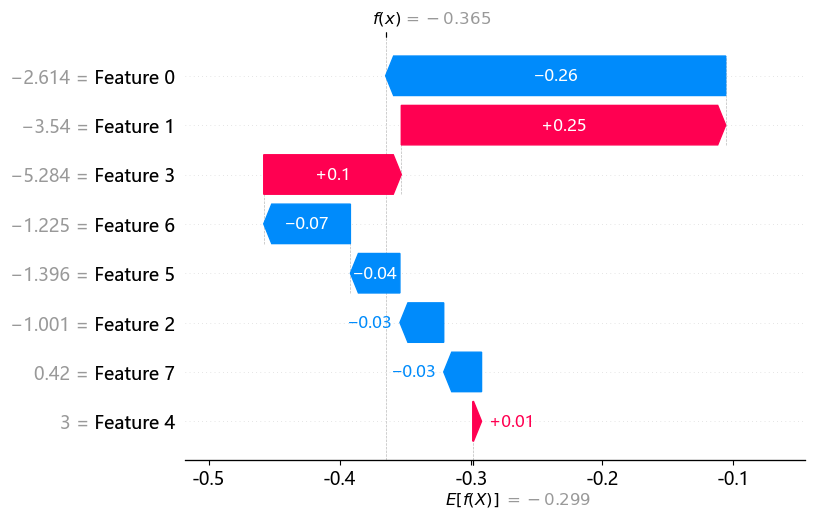

In [101]:
import xgboost
import shap
#name_list_outlier = ['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標',
                #'手機電池電量','手機外殼/包膜指標','外型平均曲率','上網頻率指標',
                #'通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級']


# 假設你已經有了 explainer 和 shap_values
explainer = shap.Explainer(xgboostModel)
shap_values = explainer(trainX)

shap.plots.waterfall(shap_values[0])
# force plot
shap.force_plot(explainer.expected_value, shap_values.values[0,:], data_train[feature_ex].iloc[0,:])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


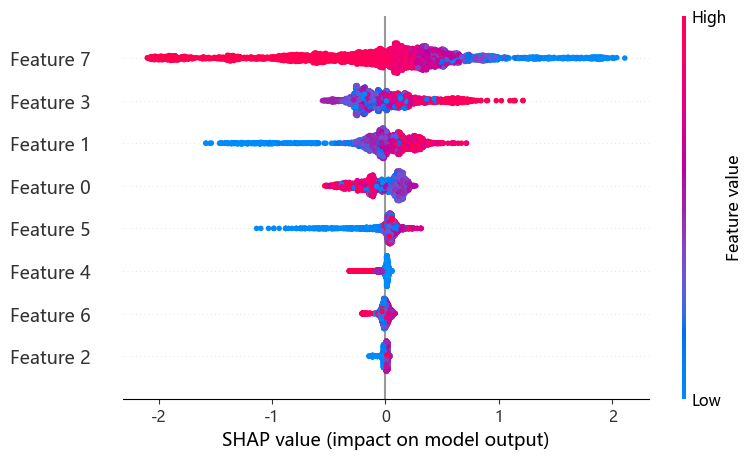

In [102]:
shap.summary_plot(shap_values, trainX)

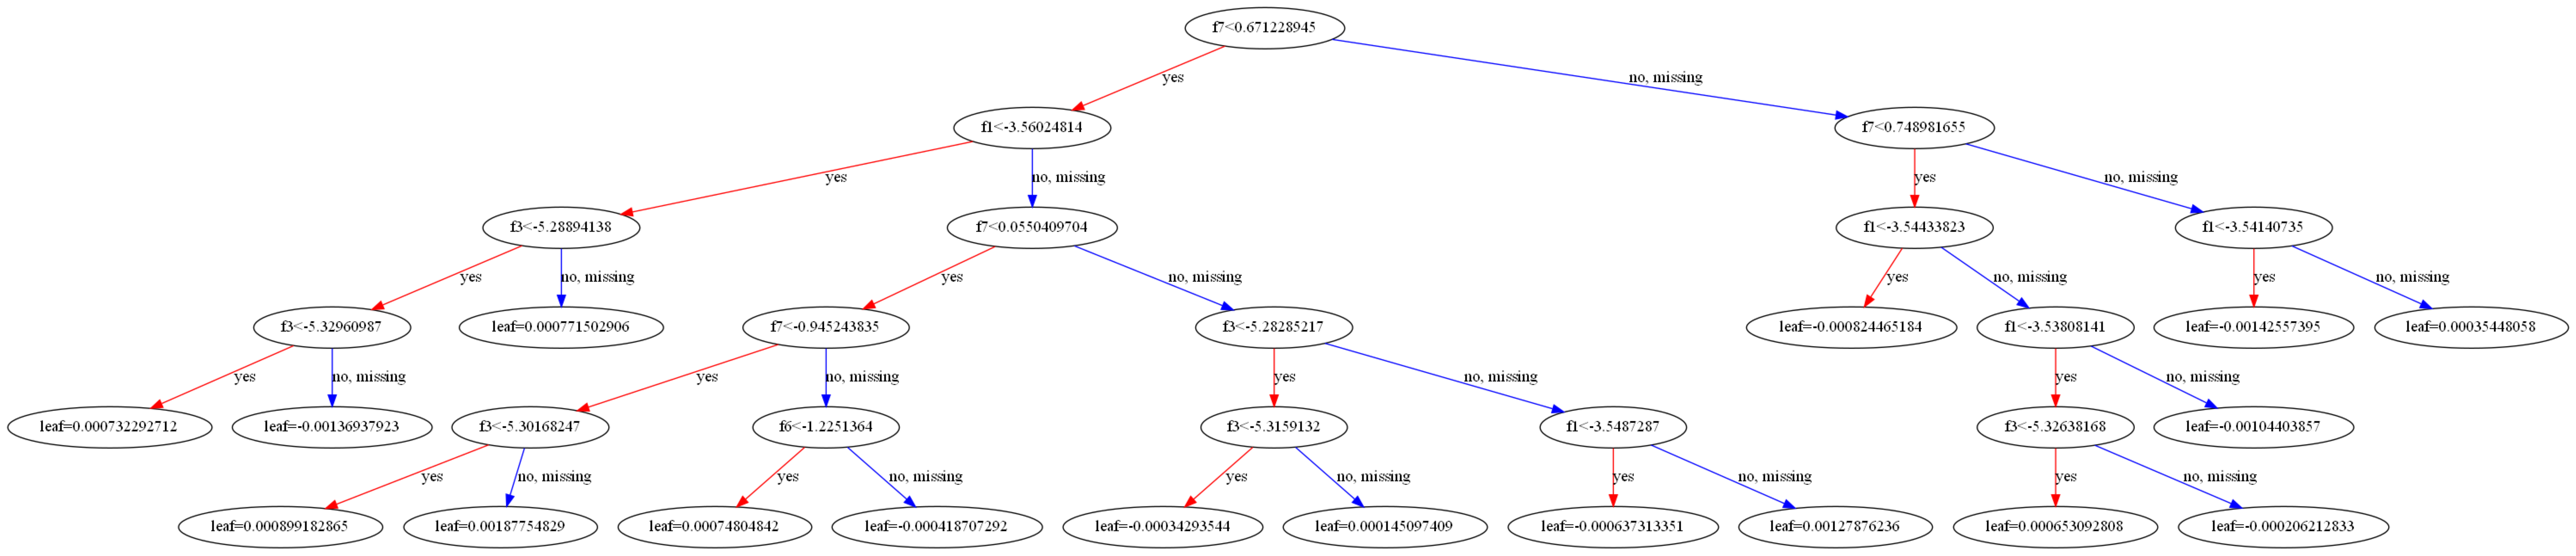

In [103]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(100, 100))
plot_tree(xgboostModel, ax=ax)
plt.savefig('xgboost_tree.png')
plt.show()

In [104]:
from sklearn.model_selection import GridSearchCV

def xgboost_model_tuning(trainX, trainY):
    # 定义模型
    model = XGBClassifier(n_estimators=10000)

    # 设置参数网格
    param_grid = {
        'gamma': np.arange(4, 5, 0.01),  # 探索 gamma 值从 0 到 0.1，步长为 0.01
        'learning_rate': np.arange(0.3, 0.4, 0.01),
        'max_depth': np.arange(0, 6, 1)              # 同时探索不同的学习率
    }

    # 创建 GridSearchCV 对象
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,
                               scoring='accuracy', verbose=1, n_jobs=-1)

    # 运行网格搜索
    grid_search.fit(trainX, trainY)

    # 打印最佳参数和最佳模型的得分
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

    return grid_search

# 假设 trainX 和 trainY 已经是预处理好的训练数据
# 使用 trainX, trainY 调用函数
grid_search_result = xgboost_model_tuning(trainX, trainY)


Fitting 5 folds for each of 6600 candidates, totalling 33000 fits


KeyboardInterrupt: 

In [ ]:


def xgboostModel_fun(n=10000, lr=0.01, maxdepth=3, g=10):
    xgboostModel = XGBClassifier(n_estimators=n, 
                                 learning_rate=lr,
                                 max_depth=maxdepth,
                                 gamma=g)
    return xgboostModel

otrn = []
otst = []
change = 0.1
divisors = np.arange(0.02, change, 0.001)  # 这样 divisors 就与 otrn 和 otst 长度一致

for g in divisors:
    tree = xgboostModel_fun(lr=g) 
    tree.fit(trainX, trainY) 
    otrn.append(1 - tree.score(trainX, trainY)) 
    otst.append(1 - tree.score(testX, testY))

fig, ax = plt.subplots()
fig.set_size_inches((10, 6))
_=ax.plot(divisors, otrn, '--s', label='train', color='k')
_=ax.plot(divisors, otst, '-o', label='test', color='gray')
_=ax.fill_between(divisors, otrn, otst, color='gray', alpha=.3)
_=ax.legend(loc=0)
_=ax.set_xlabel('Gamma value', fontsize=14)  # 更正 x 轴标签
_=ax.set_ylabel('Error', fontsize=14)
_=ax.axis(xmin=0, xmax=change)  # xmax 为 change
fig.tight_layout()
